In [0]:
# Library import
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.python.keras.backend import set_session
from tensorflow.python.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [0]:
#Mounting Google drive to access images and model to predict
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#Load the model
sess = tf.InteractiveSession()
model = load_model('/content/drive/My Drive/Data_Science/Dissertation/Inception_batch32_SGD_0.005_30epochs.log.hdf5')

In [0]:
#Preprocess image, calling the predic method, find classes with prob>60% and match with lable
def predict_class(model, image, show_debug = False):
    img = np.expand_dims(image, axis=0)
    img = img / 255  
    pred = model.predict(img, verbose=0)
    #print(pred)
    max_prob = np.amax(pred)
    if max_prob > 0.6:
      #print(pred)
      index = np.argmax(pred)
      food_list.sort()
      pred_value = food_list[index]
      fill_dict(pred_value)
      if show_debug:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

In [0]:
#Fill the dictionary with lables
def fill_dict(key):
  if key in classes:
    classes[key] += 1
  else:
    classes[key] = 1

In [0]:
# Find the winner lables
def winner():
  winners = []
  for k,v in classes.items():
    if v > 1:
      winners.append(k)
  return winners
      #print("On the plate is " + k)

In [0]:
#filepath = ('/content/drive/My Drive/Test_images/4/steak+eggs_benedict+french_fries+greek_salad2.jpg')
#filepath = ('/content/drive/My Drive/Test_images/4/steak+eggs_benedict+french_fries+greek_salad.jpg')
#filepath = ('/content/drive/My Drive/Test_images/3/baby_back_ribs+caesar_salad+french_fries.jpg')
#filepath = ('/content/drive/My Drive/Test_images/2/risotto+eggs_benedict.jpg')
filepath = ('/content/drive/My Drive/Test_images/1/dumplings.jpg')

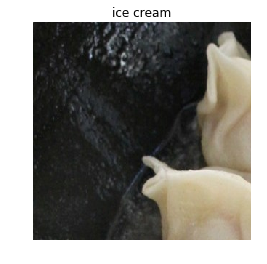

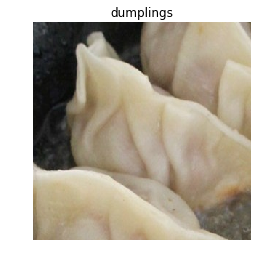

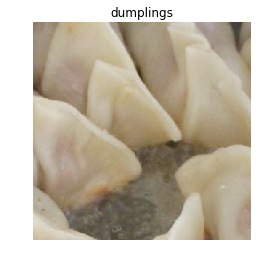

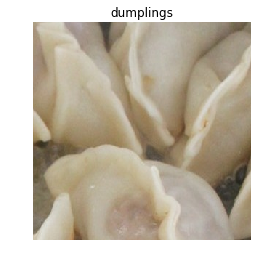

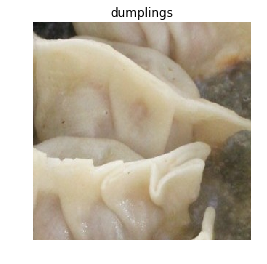

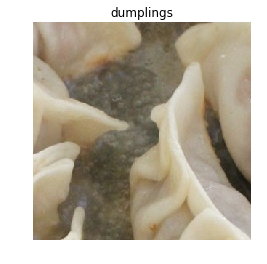

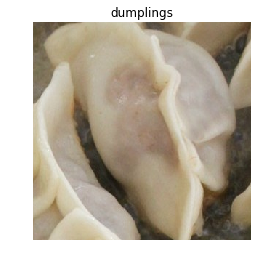

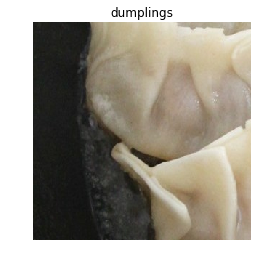

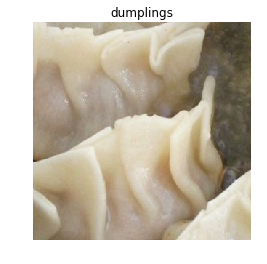

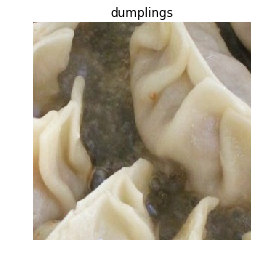

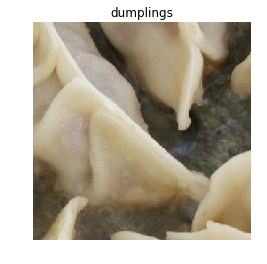

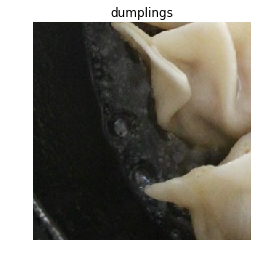

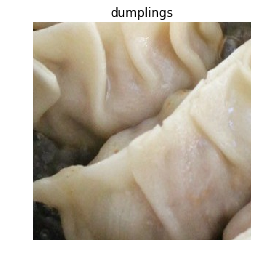

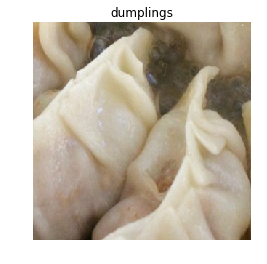

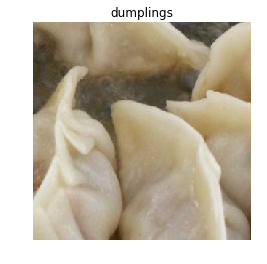

{'ice cream': 1, 'dumplings': 14}


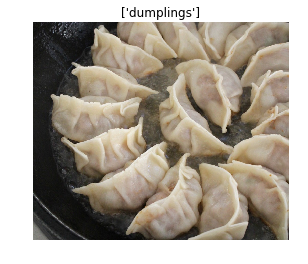

CPU times: user 9.03 s, sys: 1.43 s, total: 10.5 s
Wall time: 9.44 s


In [12]:
#Getting patches from the initial image
%%time
classes = {}
image_file = filepath
im = Image.open(image_file)
img_raw = tf.read_file(image_file)

food_list = ['apple pie','baby back ribs','bread pudding','breakfast burrito','caesar salad','chicken curry','chicken wings','club sandwich','cup cakes','dumplings','eggs benedict','filet mignon','fish and chips','french fries','french toast','greek salad','grilled cheese sandwich','grilled salmon','hamburger','hot dog','ice cream','macaroni and cheese','macarons','omelette','pancakes','pizza','pork chop','prime rib','risotto','spaghetti bolognese','spaghetti carbonara','steak']
image = tf.image.decode_image(img_raw).eval()
sliding = sess.run(tf.shape(image))

ksize_rows, ksize_cols = int((sliding[0] * 30)/100), int((sliding[1] * 30)/100)
strides_rows, strides_cols =  int((ksize_rows * 60)/100), int((ksize_cols * 60)/100)

ksizes = [1, ksize_rows, ksize_cols, 1] # The size of sliding window
strides = [1, strides_rows, strides_cols, 1]# How far the centers of 2 consecutive patches are in the image
rates = [1, 1, 1, 1] # sample pixel consecutively

padding='VALID' # or 'SAME'

image_expanded = tf.expand_dims(image, 0)
image_patches = tf.extract_image_patches(image_expanded, ksizes, strides, rates, padding)

shapes = sess.run(tf.shape(image_patches))
nr, nc = shapes[1], shapes[2]

for i in range(nr):
  for j in range(nc):
    x = sess.run(tf.reshape(image_patches[0,i,j,], [ksize_rows, ksize_cols, 3]))
    x = cv2.resize(x, dsize=(300, 300), interpolation=cv2.INTER_CUBIC)
    predict_class(model, x, True)
print(classes)
plt.imshow(im)                           
plt.axis('off')
plt.title(winner())
plt.show()